In [ ]:
# Ejercicios

# Es sabido que, una entidad que presta servicios o productos (pudiera ser una empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de
# cliente desarrollando productos personalizados en pos de las preferencias y necesidades de cada uno de sus clientes.
# El set de datos potencial contiene datos sobre clientes de una institución financiera:
# ● Customer ID: ID asociado al cliente
# ● Age: Edad en años del cliente
# ● Income: Ingreso anual del cliente
# ● Family: Tamaño del grupo familiar del cliente
# ● CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito
# ● Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si posee estudios especializadoss (magister, doctorado, etcétera)
# ● Mortgage: Monto de la hipoteca (0 indica que no posee)
# ● ZIP Code: Código postal del domicilio
# En la última campaña a cada cliente se le ofreció un producto personalizado en base a su comportamiento financiero, preferencias, capacidad de pago y
# necesidades. La variable target corresponde a Personal Loan el cual indica si el cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto
# ofrecido? ), donde 0 indica que el cliente no adquirió el producto y 1 indica que sí lo adquirió.
# Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar
# a los clientes con dichas características y priorizarlos a ellos en las próximas campañas.

In [37]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [17]:
pip install openpyxl

                                              0.0/250.0 kB ? eta -:--:--
     -------------------------------------- 250.0/250.0 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\bebit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Accuracy: 98.56%
[[1113    3]
 [  15  119]]


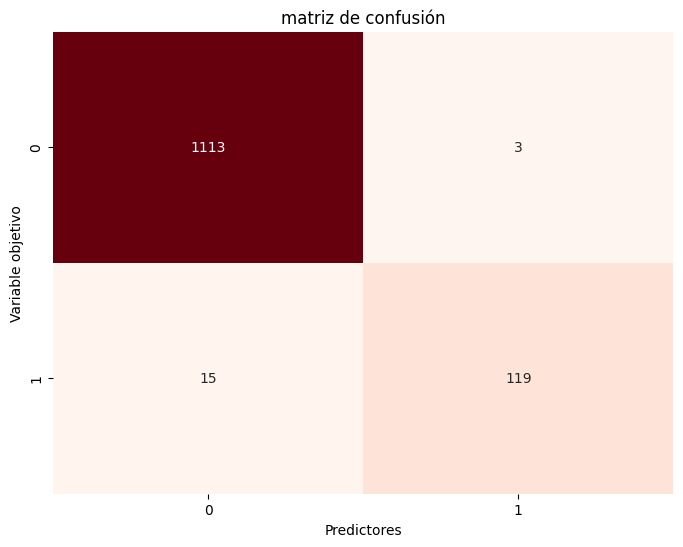

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué columnas le hacen sentido incluir en un modelo para predecir si un cliente
# tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde que puede usar la función drop('nombre columna a eliminar', axis=1).

# Cargar los datos desde un archivo CSV
#data = pd.read_csv("C:/Users/bebit/Desktop/tareas/csv/potencial.csv")
data = pd.read_excel("C:/Users/bebit/Desktop/tareas/csv/potencial.xlsx", decimal=',')


# Separar los predictores (X) y la variable objetivo (y)
X = data.drop("Personal Loan", axis=1)
y = data["Personal Loan"]

# Dividir los datos en conjuntos de entrenamiento y prueba (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Mostrar la matriz de confusión en un gráfico
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
ax.set_xlabel('Predictores')
ax.set_ylabel('Variable objetivo')
ax.set_title('matriz de confusión')
plt.show()


In [19]:
print(data.columns) #ver columnas


Index(['ID', 'Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan'],
      dtype='object')


In [20]:
# b) Determine cuáles son las variables predictoras que son categorías y obtenga las variables dummies correspondientes para incluirlas en el modelo.
# Recuerde que puede usar la función get_dummies() de pandas.

# Obtener las variables predictoras categoricas
categorical_vars = ['Education']  # Agrega aquí el nombre de las variables categóricas

# Obtener las variables dummies
dummy_vars = pd.get_dummies(data[categorical_vars], drop_first=True)

# Concatenar las variables dummies al conjunto de datos original
data = pd.concat([data, dummy_vars], axis=1)

# Eliminar las variables predictoras categóricas originales
data = data.drop(categorical_vars, axis=1)

# Mostrar las primeras filas del DataFrame
print(data.head())



   ID  Age  Income  ZIP Code  Family  CCAvg  Mortgage  Personal Loan
0   1   25      49     91107       4    1.6         0              0
1   2   45      34     90089       3    1.5         0              0
2   3   39      11     94720       1    1.0         0              0
3   4   35     100     94112       1    2.7         0              0
4   5   35      45     91330       4    1.0         0              0


In [21]:
#c) Defina en un objeto X las variables predictoras y en Y la variable respuesta Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción 5:1. 
#Recuerde que la función train_test_split() es útil para realizar split simple, además fije una semilla 2021 (random_state=2021 en la función train_test_split()).


# Definir variables predictoras (X) y variable respuesta (Y)
X = data.drop('Personal Loan', axis=1)
Y = data['Personal Loan']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2021)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (4000, 7)
Shape of X_test: (1000, 7)
Shape of Y_train: (4000,)
Shape of Y_test: (1000,)


MSE: 0.05


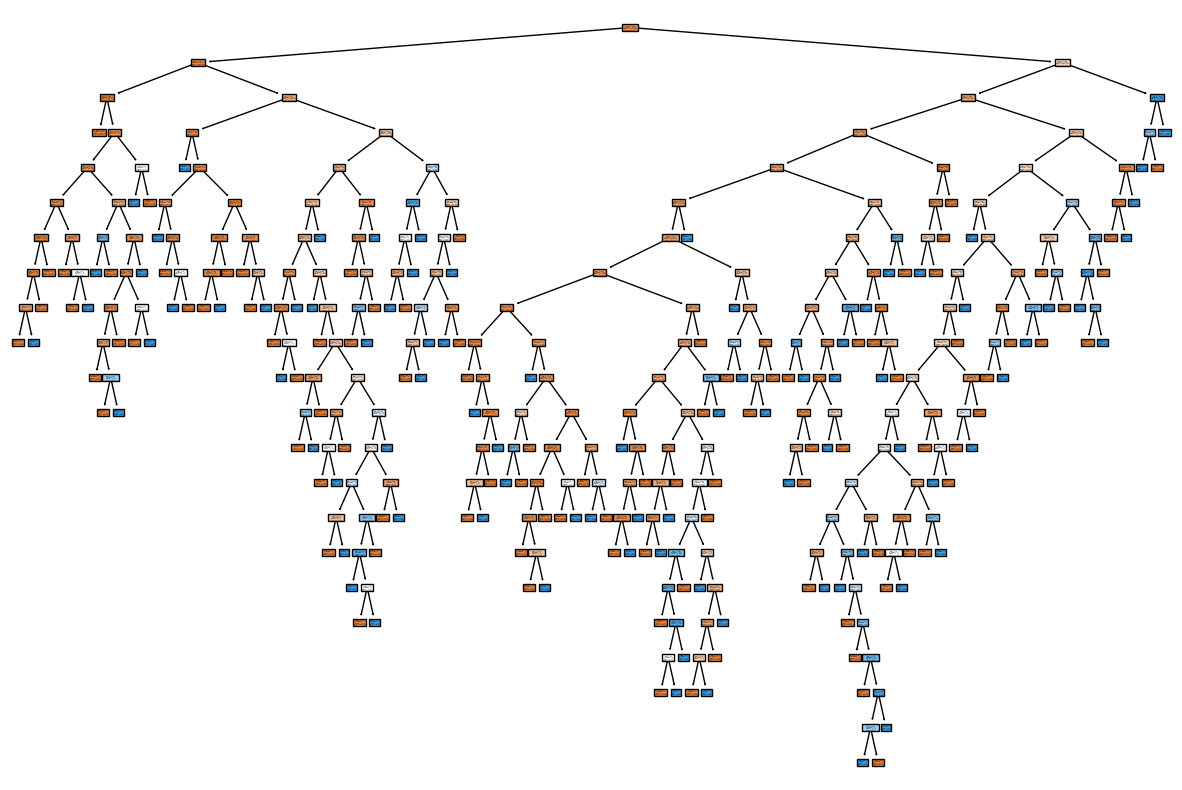

In [22]:
# d) Obtenga un árbol de decisión con el set de datos de entrenamiento. Obtenga el MSE del modelo en el set de prueba. Muestre el árbol obtenido, ¿qué observa? 
#¿cuáles podrían ser los problemas de este árbol? ¿qué alternativas pudieran probarse para abordar este problema?

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=2021)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
Y_pred = tree_model.predict(X_test)

# Calcular el MSE del modelo
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Mostrar el árbol de decisión
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["No Loan", "Loan"])
plt.show()


# ¿qué observa? 
# En resumen, el árbol de decisión obtenido en el script muestra cómo se toman decisiones basadas en las características de los clientes, pero su complejidad 
# y posible sobreajuste podrían plantear desafíos en términos de interpretación y rendimiento. Es importante explorar alternativas y ajustes adicionales para 
# mejorar la calidad del modelo.


# ¿cuáles podrían ser los problemas de este árbol?
# sobreajuste a los datos de entrenamiento, complejidad excesiva, sensibilidad a cambios pequeños en los datos y falta de generalización. Estos problemas pueden 
# afectar la precisión y la aplicabilidad del modelo en situaciones reales. Se requieren medidas adicionales para abordar estos problemas y mejorar el desempeño 
# del modelo.


# ¿qué alternativas pudieran probarse para abordar este problema?
# Podar el árbol para reducir su complejidad y evitar el sobreajuste.
# Ajustar los parámetros del árbol, como la profundidad máxima, para obtener un equilibrio adecuado.
# Utilizar métodos de ensemble, como Random Forest o Gradient Boosting, que combinan múltiples árboles para mejorar la precisión.
# Realizar una selección de características para eliminar aquellas que sean irrelevantes o redundantes.
# Probar otros algoritmos de clasificación, como Support Vector Machines, Naive Bayes o Regresión Logística, para comparar su rendimiento.

MSE: 0.031


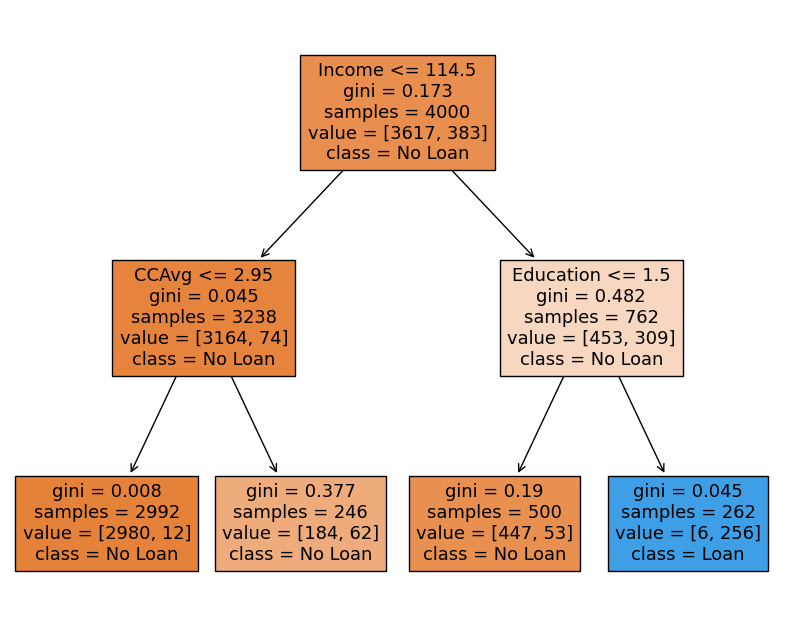

In [39]:
# e) Plantee otro árbol de decisión pero definiendo como parámetro de control o prepoda la profundidad máxima del árbol, para esto en la función
# DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo 
# anterior. Observe el árbol obtenido. Comente.

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

# Definir el árbol de decisión con profundidad máxima de 2
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=2021)

# Ajustar el modelo con el conjunto de entrenamiento
decision_tree.fit(X_train, y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular el MSE en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.show()


In [38]:
# f) Busque los mejores valores de los criterios de corte y máxima profundidad para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint: evalue los 
# hiperparámetros criterion y max_depth)


# Definir los valores de los hiperparámetros que deseas probar
criteria = ['gini', 'entropy']
max_depths = [2, 4, 6, 8, 10]

# Inicializar una lista para almacenar los resultados de la validación cruzada
results = []

# Realizar la validación cruzada para cada combinación de hiperparámetros
for criterion in criteria:
    for max_depth in max_depths:
        # Crear el modelo de árbol de decisión con los hiperparámetros actuales
        decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=2021)
        
        # Realizar la validación cruzada con 10 folds y obtener el score promedio
        scores = cross_val_score(decision_tree, X, y, cv=10)
        mean_score = scores.mean()
        
        # Guardar el resultado en la lista de resultados
        results.append({'criterion': criterion, 'max_depth': max_depth, 'mean_score': mean_score})

# Ordenar los resultados por el score promedio de mayor a menor
results = sorted(results, key=lambda x: x['mean_score'], reverse=True)

# Imprimir los mejores valores de los hiperparámetros
best_params = results[0]
print("Mejores hiperparámetros:")
print("Criterio de corte:", best_params['criterion'])
print("Máxima profundidad:", best_params['max_depth'])
print("Score promedio:", best_params['mean_score'])


Mejores hiperparámetros:
Criterio de corte: entropy
Máxima profundidad: 4
Score promedio: 0.983
